# Applying SVM algorithm to the the crime data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
balance_data = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
balance_data = balance_data.replace('?', '0')

In [4]:
balance_data.shape

(2215, 147)

In [5]:
balance_data.head

<bound method NDFrame.head of                Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          0             0     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
5             Springfieldcity    MO          0             0     1   
6                 Norwoodtown    MA         21         50250     1   
7                Andersoncity    IN          0             0     1   
8                   Fargocity    ND         17         25700     1   
9                    Wacocity    TX          0             0     1   
10                Shermancity    TX          0             0     1   
11               SanPablocity    CA          0             0     1   
12           BowlingGreencity    KY          0             0

In [6]:
violent_crimes = list(map(float, balance_data.ViolentCrimesPerPop))

Since in order to predict if a crime occurred, we have generated a new column. We have taken the mean of the violent crimes from the data set and if the value of violent crimes falls below the mean then we have assigned 0 else 1.

In [7]:
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)

In [8]:
violent_crimes_mean

530.3040045146731

In [9]:
balance_data['mean_violent_crimes'] = violent_crimes_mean

In [10]:
balance_data['violent_crime_occurence'] = np.where(violent_crimes>=balance_data['mean_violent_crimes'], '1', '0')

In order to predict the outcome we have choosen certain features such  as  population,'householdsize','racePctWhite','racepctblack','racePctHisp','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence' to predict crime occurances.

In [11]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
balance_data = balance_data[['population','householdsize','racePctWhite','racepctblack','racePctHisp','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
balance_data = balance_data
balance_data.head

<bound method NDFrame.head of       population  householdsize  racePctWhite  racepctblack  racePctHisp  \
0          11980           3.10         91.78          1.37         1.88   
1          23123           2.82         95.57          0.80         0.85   
2          29344           2.43         94.33          0.74         2.35   
3          16656           2.40         97.35          1.70         0.70   
4          11245           2.76         89.16          0.53         0.52   
5         140494           2.45         95.65          2.51         0.95   
6          28700           2.60         96.57          1.60         1.10   
7          59459           2.45         84.87         14.20         0.63   
8          74111           2.46         97.11          0.35         0.73   
9         103590           2.62         67.60         23.14        16.35   
10         31601           2.54         83.22         12.63         4.39   
11         25158           2.89         49.42         21.3

Firstly it was kind of difficult for us to analyse if the data was linearly scattered or not. So we thought of applying both SVM and kernal SVM (gaussian) to predict the model accuracy. 
The features that higly contribute or have a huge impact on the violent crime occurrence are the population of blacks and population of hispanic. These two contributed a hight impact on the model performance. So based on these two features we have trained the model by splitting the data into 70 and 30. So we got our model accuracy to be 80.9%

In [12]:
X_SVM = balance_data.iloc[:, [3, 4]].values
Y_SVM = balance_data.iloc[:, 12].values

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train_SVM, X_test_SVM, Y_train_SVM, Y_test_SVM = train_test_split(X_SVM, Y_SVM, test_size = 0.30, random_state = 0)


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(X_train_SVM)
X_test_SVM = sc.transform(X_test_SVM)
print(X_train_SVM)

[[ 0.557996   -0.49362092]
 [-0.58847309 -0.28112885]
 [-0.62648141  3.73638802]
 ...
 [-0.27887807  1.55338608]
 [-0.55737538 -0.35266784]
 [ 0.01551364  0.09498213]]


In [15]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
Y_Pred_SVM = classifier.predict(X_test_SVM)

The support vectors for the model are as follows

In [20]:
print(classifier.support_vectors_)

[[ 0.5282804  -0.43128991]
 [-0.24847141  0.92865938]
 [-0.21530052 -0.43483145]
 ...
 [ 0.69275276 -0.09059428]
 [-0.27887807  1.55338608]
 [ 0.01551364  0.09498213]]


#Confusion Matrix

Model Accuracy for Random Forest: 0.8090225563909774


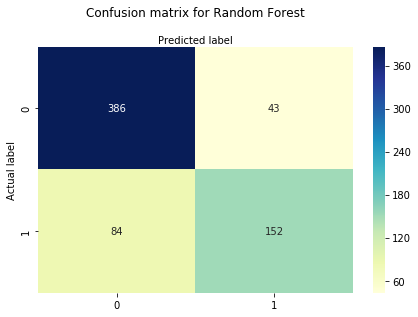

In [36]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVM)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVM))


In [37]:
ac=accuracy_score(Y_test_SVM,Y_pred_SVM)*100

The acccuracy of the model is 80.9%

In [38]:
ac

80.90225563909775

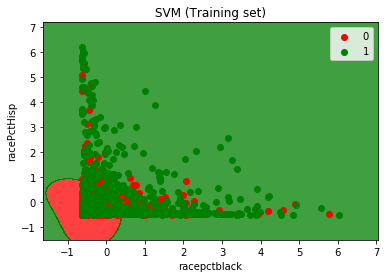

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_SVM, Y_train_SVM
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

From the above we can visualize the train data set. We see that the model was able to linearly sepearte whether a crime occurred or not. If we see the figure above and below we can see some incorrect predictions of our model where it preddicted crime for some aspects in the red area, similarly it can also be seen that there were no crimes where the model preditced crime occurrances in the green area. 

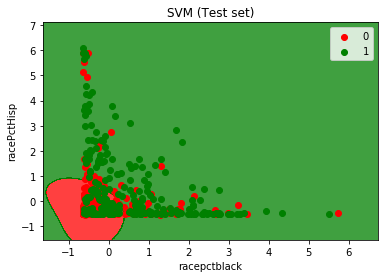

In [40]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_SVM, Y_test_SVM
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

Now applying Kernal SVM to predict our model based on the same features. When kernal SVM was applied our model accuracy came to 79.8% which was very close to the linear prediction. Therby we have concluded that the data was linearly distributed and the applying SVM would give us an accurate model to make predictions.

In [41]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
Y_Pred_SVMrbf = classifier.predict(X_test_SVM)

Model Accuracy for Random Forest: 0.7984962406015037


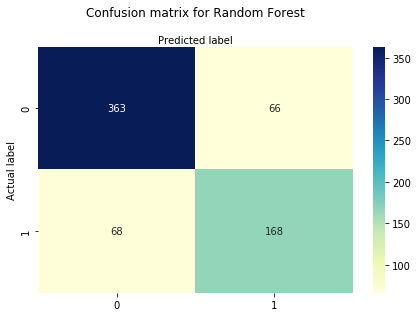

In [47]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVMrbf)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVMrbf))


In [48]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVMrbf)*100

In [49]:
ac

79.84962406015038